# Group 3 End Term Project 2

## Sentiment Analysis and Topic Modelling of Spotify Reviews Data

In [1]:
# Importing Libraries

import re
import pandas as pd

In [2]:
# Reading the File

review = pd.read_csv("Spotify_dataset.csv")

In [3]:
# Reviewing the data file

review.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,aef875b6-be76-4892-a8e6-f5e9a495efda,Dark Privilege,https://play-lh.googleusercontent.com/a/ALm5wu...,Didn't get free subscription and too much mone...,1,0,NaN,2022-09-23 14:31:28,NaN,NaN,newest,com.spotify.music
1,8aaddfbf-1f6b-47bf-9d87-7b9d23a3a1d1,Babusi Kontle,https://play-lh.googleusercontent.com/a-/ACNPE...,💯%,1,0,8.7.64.478,2022-09-23 14:27:00,NaN,NaN,newest,com.spotify.music
2,fe3a21bd-ec06-4bbd-b6b5-e363039f9385,N D,https://play-lh.googleusercontent.com/a/ALm5wu...,I downloaded all these albums but when I try t...,1,2,8.7.64.478,2022-09-23 14:23:43,NaN,NaN,newest,com.spotify.music
3,2cc9fe38-7d17-439b-ae89-cfa8be34796b,Adam,https://play-lh.googleusercontent.com/a/ALm5wu...,Installed itself on my pc without my permission.,1,0,5.7.0.781,2022-09-23 14:14:43,NaN,NaN,newest,com.spotify.music
4,5a73a797-790e-4d34-bc10-8f2a033006f9,Skyler Canuela,https://play-lh.googleusercontent.com/a/ALm5wu...,I CANT LISSEN THE SONG NORMAL I PUT TO DADELAT...,1,0,8.7.68.568,2022-09-23 13:53:48,NaN,NaN,newest,com.spotify.music


In [4]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    review['content'] = review['content'].str.replace(char, ' ')

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_60572/3813162649.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  review['content'] = review['content'].str.replace(char, ' ')


In [5]:
# Converting the column to string
review=review.dropna()
df = review['content'].to_string(header=False,index=False)

In [6]:
# Data Cleaning
df_review = re.sub('[^A-Za-z0-9]+', ' ', df) #taking only words  and numbers
print(df_review)

Ui gets worse and worse Can no longer sort art i cannot connect my devices anymore i used to You would think that playing music would be a d I wrote this in 2020 still relevant unbelie Won t load account or accept payment info Some buttons don t work when there s blue light Four 4 30secs ad back to back is this music a In few days the app was working good but when I App extremely sluggish and freezing Albums son Why is this skipping at mid song randomly Forever mahirap mag log in sa app na to Shuta My artist canvases are not working despite enab Why is it that I can load YouTube and play HD v App seems to cause connection issues with Andro Constant scams fake ratings manipulative co The one and only app that stutters on my Blueto When I add more music to a playlist the play Off line downloaded music lags when suddenly go Tired of dismissing popups I have all notifica Songs keep getting deleted the randomizer shuf audio keeps stopping for no reason keep havin I paid for premium only to 

In [7]:
# Lowercase

df_review= df_review.lower()

print(df_review)

ui gets worse and worse can no longer sort art i cannot connect my devices anymore i used to you would think that playing music would be a d i wrote this in 2020 still relevant unbelie won t load account or accept payment info some buttons don t work when there s blue light four 4 30secs ad back to back is this music a in few days the app was working good but when i app extremely sluggish and freezing albums son why is this skipping at mid song randomly forever mahirap mag log in sa app na to shuta my artist canvases are not working despite enab why is it that i can load youtube and play hd v app seems to cause connection issues with andro constant scams fake ratings manipulative co the one and only app that stutters on my blueto when i add more music to a playlist the play off line downloaded music lags when suddenly go tired of dismissing popups i have all notifica songs keep getting deleted the randomizer shuf audio keeps stopping for no reason keep havin i paid for premium only to 

In [8]:
# Tokenization

import nltk

from nltk.tokenize import word_tokenize

tokens = nltk.word_tokenize(df_review)

In [9]:
# Stop words removal

from nltk.corpus import stopwords

stop_words = stopwords.words('english')

filtered_review = [word for word in tokens if word not in stop_words] # removing stop words

print(filtered_review)

['ui', 'gets', 'worse', 'worse', 'longer', 'sort', 'art', 'connect', 'devices', 'anymore', 'used', 'would', 'think', 'playing', 'music', 'would', 'wrote', '2020', 'still', 'relevant', 'unbelie', 'load', 'account', 'accept', 'payment', 'info', 'buttons', 'work', 'blue', 'light', 'four', '4', '30secs', 'ad', 'back', 'back', 'music', 'days', 'app', 'working', 'good', 'app', 'extremely', 'sluggish', 'freezing', 'albums', 'son', 'skipping', 'mid', 'song', 'randomly', 'forever', 'mahirap', 'mag', 'log', 'sa', 'app', 'na', 'shuta', 'artist', 'canvases', 'working', 'despite', 'enab', 'load', 'youtube', 'play', 'hd', 'v', 'app', 'seems', 'cause', 'connection', 'issues', 'andro', 'constant', 'scams', 'fake', 'ratings', 'manipulative', 'co', 'one', 'app', 'stutters', 'blueto', 'add', 'music', 'playlist', 'play', 'line', 'downloaded', 'music', 'lags', 'suddenly', 'go', 'tired', 'dismissing', 'popups', 'notifica', 'songs', 'keep', 'getting', 'deleted', 'randomizer', 'shuf', 'audio', 'keeps', 'stopp

In [10]:
# Lemmatization
import nltk

from nltk.stem import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemm_review = [lemmatizer.lemmatize(word) for word in filtered_review]

print(lemm_review)

['ui', 'get', 'worse', 'worse', 'longer', 'sort', 'art', 'connect', 'device', 'anymore', 'used', 'would', 'think', 'playing', 'music', 'would', 'wrote', '2020', 'still', 'relevant', 'unbelie', 'load', 'account', 'accept', 'payment', 'info', 'button', 'work', 'blue', 'light', 'four', '4', '30secs', 'ad', 'back', 'back', 'music', 'day', 'app', 'working', 'good', 'app', 'extremely', 'sluggish', 'freezing', 'album', 'son', 'skipping', 'mid', 'song', 'randomly', 'forever', 'mahirap', 'mag', 'log', 'sa', 'app', 'na', 'shuta', 'artist', 'canvas', 'working', 'despite', 'enab', 'load', 'youtube', 'play', 'hd', 'v', 'app', 'seems', 'cause', 'connection', 'issue', 'andro', 'constant', 'scam', 'fake', 'rating', 'manipulative', 'co', 'one', 'app', 'stutter', 'blueto', 'add', 'music', 'playlist', 'play', 'line', 'downloaded', 'music', 'lag', 'suddenly', 'go', 'tired', 'dismissing', 'popups', 'notifica', 'song', 'keep', 'getting', 'deleted', 'randomizer', 'shuf', 'audio', 'keep', 'stopping', 'reason'

In [11]:
import sklearn as sk
import math 

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

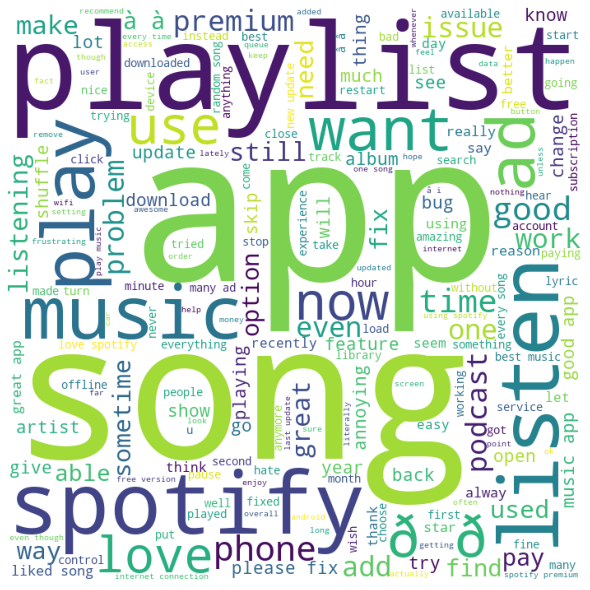

In [13]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
 
df = pd.read_csv("Spotify_dataset.csv", encoding ="latin-1")
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.content:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [14]:
text = " ".join(cat for cat in lemm_review)

In [15]:
from textblob import TextBlob
res = TextBlob(text)
print(res.sentiment.polarity)

0.2455050700579154


In [29]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [30]:
review['scores'] = review['content'].apply(lambda review: sid.polarity_scores(review))

review.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId,scores,compound,comp_score,totalwords,clean_review
87,d836d9ae-cc42-4cdd-a50f-e53cd9609799,Gregori Asanti,https://play-lh.googleusercontent.com/a/ALm5wu...,Ui gets worse and worse Can no longer sort ar...,1,2,8.7.66.534,2022-09-23 00:25:22,Hi Gregori! We don’t have any info to share at...,2020-05-19 16:08:17,newest,com.spotify.music,"{'neg': 0.264, 'neu': 0.586, 'pos': 0.149, 'co...",-0.8748,neg,69,ui gets worse worse longer sort artists name c...
329,79ffd266-dc80-4591-ab2e-97895ff19b25,Clare Costales,https://play-lh.googleusercontent.com/a-/ACNPE...,i cannot connect my devices anymore i used to...,1,11,8.7.66.534,2022-09-21 17:28:39,Hey! Sorry to hear that. We’d recommend reinst...,2020-06-18 16:34:52,newest,com.spotify.music,"{'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'comp...",0.1779,pos,22,cannot connect devices anymore used play lapto...
553,7a749553-05f6-40ab-87bd-790a435df042,Kevin Kelley,https://play-lh.googleusercontent.com/a-/ACNPE...,You would think that playing music would be a ...,1,2,8.7.66.534,2022-09-20 09:44:10,Hey! We’d love to get some more info from you ...,2020-05-23 14:45:28,newest,com.spotify.music,"{'neg': 0.154, 'neu': 0.78, 'pos': 0.066, 'com...",-0.5806,neg,63,would think playing music would difficult thin...
1063,dbfd117a-3edc-42a7-80c9-0a58556709a0,Solann Díaz,https://play-lh.googleusercontent.com/a-/ACNPE...,I wrote this in 2020 still relevant unbeli...,1,0,8.7.66.534,2022-09-17 08:38:44,Hey! We always aim to improve the app and we’d...,2020-06-06 15:09:24,newest,com.spotify.music,"{'neg': 0.028, 'neu': 0.872, 'pos': 0.1, 'comp...",0.5574,pos,78,wrote 2020 still relevant unbelievable make an...
1206,10115a62-2fdd-473a-a858-dee53e8d5bec,Nate M,https://play-lh.googleusercontent.com/a/ALm5wu...,Won t load account or accept payment info,1,0,8.7.66.532,2022-09-16 17:46:13,"Hey, we’re sorry to hear that. We’d love to ge...",2020-10-28 14:49:48,newest,com.spotify.music,"{'neg': 0.0, 'neu': 0.442, 'pos': 0.558, 'comp...",0.7430,pos,8,load account accept payment info


In [31]:
review['compound']  = review['scores'].apply(lambda score_dict: score_dict['compound'])

review.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId,scores,compound,comp_score,totalwords,clean_review
87,d836d9ae-cc42-4cdd-a50f-e53cd9609799,Gregori Asanti,https://play-lh.googleusercontent.com/a/ALm5wu...,Ui gets worse and worse Can no longer sort ar...,1,2,8.7.66.534,2022-09-23 00:25:22,Hi Gregori! We don’t have any info to share at...,2020-05-19 16:08:17,newest,com.spotify.music,"{'neg': 0.264, 'neu': 0.586, 'pos': 0.149, 'co...",-0.8748,neg,69,ui gets worse worse longer sort artists name c...
329,79ffd266-dc80-4591-ab2e-97895ff19b25,Clare Costales,https://play-lh.googleusercontent.com/a-/ACNPE...,i cannot connect my devices anymore i used to...,1,11,8.7.66.534,2022-09-21 17:28:39,Hey! Sorry to hear that. We’d recommend reinst...,2020-06-18 16:34:52,newest,com.spotify.music,"{'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'comp...",0.1779,pos,22,cannot connect devices anymore used play lapto...
553,7a749553-05f6-40ab-87bd-790a435df042,Kevin Kelley,https://play-lh.googleusercontent.com/a-/ACNPE...,You would think that playing music would be a ...,1,2,8.7.66.534,2022-09-20 09:44:10,Hey! We’d love to get some more info from you ...,2020-05-23 14:45:28,newest,com.spotify.music,"{'neg': 0.154, 'neu': 0.78, 'pos': 0.066, 'com...",-0.5806,neg,63,would think playing music would difficult thin...
1063,dbfd117a-3edc-42a7-80c9-0a58556709a0,Solann Díaz,https://play-lh.googleusercontent.com/a-/ACNPE...,I wrote this in 2020 still relevant unbeli...,1,0,8.7.66.534,2022-09-17 08:38:44,Hey! We always aim to improve the app and we’d...,2020-06-06 15:09:24,newest,com.spotify.music,"{'neg': 0.028, 'neu': 0.872, 'pos': 0.1, 'comp...",0.5574,pos,78,wrote 2020 still relevant unbelievable make an...
1206,10115a62-2fdd-473a-a858-dee53e8d5bec,Nate M,https://play-lh.googleusercontent.com/a/ALm5wu...,Won t load account or accept payment info,1,0,8.7.66.532,2022-09-16 17:46:13,"Hey, we’re sorry to hear that. We’d love to ge...",2020-10-28 14:49:48,newest,com.spotify.music,"{'neg': 0.0, 'neu': 0.442, 'pos': 0.558, 'comp...",0.7430,pos,8,load account accept payment info


In [32]:
review['comp_score'] = review['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

review.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId,scores,compound,comp_score,totalwords,clean_review
87,d836d9ae-cc42-4cdd-a50f-e53cd9609799,Gregori Asanti,https://play-lh.googleusercontent.com/a/ALm5wu...,Ui gets worse and worse Can no longer sort ar...,1,2,8.7.66.534,2022-09-23 00:25:22,Hi Gregori! We don’t have any info to share at...,2020-05-19 16:08:17,newest,com.spotify.music,"{'neg': 0.264, 'neu': 0.586, 'pos': 0.149, 'co...",-0.8748,neg,69,ui gets worse worse longer sort artists name c...
329,79ffd266-dc80-4591-ab2e-97895ff19b25,Clare Costales,https://play-lh.googleusercontent.com/a-/ACNPE...,i cannot connect my devices anymore i used to...,1,11,8.7.66.534,2022-09-21 17:28:39,Hey! Sorry to hear that. We’d recommend reinst...,2020-06-18 16:34:52,newest,com.spotify.music,"{'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'comp...",0.1779,pos,22,cannot connect devices anymore used play lapto...
553,7a749553-05f6-40ab-87bd-790a435df042,Kevin Kelley,https://play-lh.googleusercontent.com/a-/ACNPE...,You would think that playing music would be a ...,1,2,8.7.66.534,2022-09-20 09:44:10,Hey! We’d love to get some more info from you ...,2020-05-23 14:45:28,newest,com.spotify.music,"{'neg': 0.154, 'neu': 0.78, 'pos': 0.066, 'com...",-0.5806,neg,63,would think playing music would difficult thin...
1063,dbfd117a-3edc-42a7-80c9-0a58556709a0,Solann Díaz,https://play-lh.googleusercontent.com/a-/ACNPE...,I wrote this in 2020 still relevant unbeli...,1,0,8.7.66.534,2022-09-17 08:38:44,Hey! We always aim to improve the app and we’d...,2020-06-06 15:09:24,newest,com.spotify.music,"{'neg': 0.028, 'neu': 0.872, 'pos': 0.1, 'comp...",0.5574,pos,78,wrote 2020 still relevant unbelievable make an...
1206,10115a62-2fdd-473a-a858-dee53e8d5bec,Nate M,https://play-lh.googleusercontent.com/a/ALm5wu...,Won t load account or accept payment info,1,0,8.7.66.532,2022-09-16 17:46:13,"Hey, we’re sorry to hear that. We’d love to ge...",2020-10-28 14:49:48,newest,com.spotify.music,"{'neg': 0.0, 'neu': 0.442, 'pos': 0.558, 'comp...",0.7430,pos,8,load account accept payment info


In [33]:
review['totalwords'] = review['content'].str.split().str.len() # Calculate word count
data = review.loc[review['totalwords'] > 5] #Removing all reviews having less than five words
data = data.drop('totalwords',axis = 1)
data = review.loc[review['score'] > 3] #Removing all positive reviews to focus on negative reviews and understand the problem
df = data[data['content'].map(lambda x: x.isascii())] #Removing all non-english reviews
df = df.dropna(how='all') # dropping blank rows
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId,scores,compound,comp_score,totalwords,clean_review
62142,c6b068ae-ea2c-4e0f-8561-1d29ca45ca41,Terence Meadows,https://play-lh.googleusercontent.com/a/ALm5wu...,Why do you guys keep breaking the scroll bar,4,3,8.7.62.398,2022-09-03 10:42:59,Hi Terence! We'd love to help get this sorted....,2020-07-07 16:36:28,newest,com.spotify.music,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,9,guys keep breaking scroll bar
62452,564ace3f-462c-48d6-9fa7-ee0617e07507,Virgil Rendon,https://play-lh.googleusercontent.com/a-/ACNPE...,New update sucks Can t see my download status...,4,1,8.7.58.461,2022-08-31 17:50:43,Hi Virgil! We'd love to help get this sorted. ...,2020-06-23 16:47:13,newest,com.spotify.music,"{'neg': 0.182, 'neu': 0.818, 'pos': 0.0, 'comp...",-0.4588,neg,22,new update sucks see download status status ba...
63040,d0e5a27f-17d7-40b2-a7f6-b0514d481e04,Siyolise Mkontwana,https://play-lh.googleusercontent.com/a/ALm5wu...,Wonderful app but lately there has been a bug ...,4,0,8.7.58.462,2022-08-26 14:50:51,Hey! That's part of our free service. If you h...,2020-10-05 09:16:09,newest,com.spotify.music,"{'neg': 0.092, 'neu': 0.588, 'pos': 0.32, 'com...",0.7351,pos,23,wonderful app lately bug gets stuck plays hope...
63097,7301a137-946e-47d5-8b94-5ab22d23ab30,A1 Mizu,https://play-lh.googleusercontent.com/a-/ACNPE...,When I m listening to Spotify on my phone it ...,4,0,8.7.58.463,2022-08-25 23:38:37,"Hey there, thanks for the feedback! You can al...",2020-09-30 15:17:48,newest,com.spotify.music,"{'neg': 0.0, 'neu': 0.917, 'pos': 0.083, 'comp...",0.4215,pos,37,listening spotify phone pauses songs liked sec...
63353,a172b35c-0ae4-4e5d-8696-7b2ee65f6894,Vedran Stipic,https://play-lh.googleusercontent.com/a-/ACNPE...,Love spotify best streaming services always ...,4,1,8.7.58.455,2022-08-23 23:30:45,"Hey, we’re sorry to hear that! We’d love to ge...",2020-08-26 10:42:27,newest,com.spotify.music,"{'neg': 0.0, 'neu': 0.347, 'pos': 0.653, 'comp...",0.9062,pos,9,love spotify best streaming services always ro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98352,995bf37a-efe1-4024-afff-0b764d41e209,James Davis,https://play-lh.googleusercontent.com/a/ALm5wu...,I paid last month for Premium Family my wife...,5,0,8.7.44.968,2022-07-07 01:46:03,Hi James! We’re sorry to hear that. We’d love ...,2020-09-30 09:16:08,most_relevant,com.spotify.music,"{'neg': 0.053, 'neu': 0.867, 'pos': 0.08, 'com...",0.2263,pos,32,paid last month premium family wife unfortunat...
98449,e2d15fe2-f816-44f0-afa5-00c53545d67f,Navdeep Singh,https://play-lh.googleusercontent.com/a-/ACNPE...,Can t see people in family mix when I click on...,5,0,8.7.54.403,2022-08-06 11:59:27,Hi there! We’d recommend restarting your devic...,2020-05-14 15:18:36,most_relevant,com.spotify.music,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,21,see people family mix click picture icon black...
98977,c58e4988-fd9e-4a6a-b541-8a0b8117a08c,Phil Young,https://play-lh.googleusercontent.com/a/ALm5wu...,WHAT HAVE YOU DONE TO MY MUSIC APP I used...,5,15,8.5.79.1061,2020-10-09 20:01:12,"Hey, sorry to hear that. We'd suggest getting ...",2020-10-11 13:42:03,most_relevant,com.spotify.music,"{'neg': 0.0, 'neu': 0.974, 'pos': 0.026, 'comp...",0.2023,pos,72,done music app used able see record next selec...
99112,7b12877a-8227-4f0b-ae3e-803211f87d47,Shadi S.,https://play-lh.googleusercontent.com/a-/ACNPE...,Premium is King There is a line drawn on the ...,5,2,8.5.78.909,2020-10-04 16:48:43,Hi there! Thanks for sharing your thoughts. We...,2020-10-05 07:03:15,most_relevant,com.spotify.music,"{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'comp...",0.9245,pos,70,premium king line drawn ground abstract bounda...


In [34]:
xx = review['content'].to_string(header=False, index=False)

In [36]:
import demoji

def handle_emoji(string):
    emojis = demoji.findall(string)

    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])

    return string

In [37]:
def word_tokenizer(text):
    text = text.lower()
    text = text.split()

    return text

def remove_stopwords(text):
    text = [word for word in text if word not in stop_words]
    
    return text

def preprocessing(text):
 
    text = handle_emoji(text)
    text = text.lower() 
    text = re.sub(r'[^\w\s]', '', text)
    text = word_tokenizer(text)
    # text = stemming(text)
    text = remove_stopwords(text)
    text = " ".join(text)

    return text

In [38]:
from tqdm import tqdm

tqdm.pandas()

review['clean_review'] = review['content'].progress_map(preprocessing)

100%|██████████| 1108/1108 [00:02<00:00, 486.09it/s]


In [39]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import string
from nltk import word_tokenize, pos_tag

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [40]:
import gensim #Topic Modelling Technicque called LDA (Latent Dirichlet Allocation)
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = review['clean_review']
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['ui', 'gets', 'worse', 'worse', 'longer', 'sort', 'artists', 'name', 'cannot', 'save', 'mixtape', 'new', 'playlist', 'even', 'select', 'multiple', 'songs', 'add', 'time', 'million', 'clicks', 'creating', 'useful', 'playlist', 'annoying', 'listen', 'top', 'songs', 'favourites', 'anything']


In [41]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=50, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [43]:
# NLTK Stop words
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['crypto','even','early'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [44]:
import gensim.corpora as corpora
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2)]]


In [45]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [46]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics= 10, #change it 1-10
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           per_word_topics=True)

In [47]:
from gensim.models import CoherenceModel
# Compute Coherence Score for topic 2
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4364942185814768


In [48]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.000*"affordable" + 0.000*"pairing" + 0.000*"occasion" + 0.000*"beating" + '
  '0.000*"asleep" + 0.000*"visit" + 0.000*"evan" + 0.000*"angering" + '
  '0.000*"street" + 0.000*"possibly"'),
 (1,
  '0.000*"affordable" + 0.000*"pairing" + 0.000*"occasion" + 0.000*"beating" + '
  '0.000*"asleep" + 0.000*"visit" + 0.000*"evan" + 0.000*"angering" + '
  '0.000*"street" + 0.000*"possibly"'),
 (2,
  '0.096*"able" + 0.075*"queue" + 0.037*"probably" + 0.028*"anyway" + '
  '0.026*"log" + 0.022*"feedback" + 0.019*"around" + 0.017*"mostly" + '
  '0.017*"feel" + 0.017*"whole"'),
 (3,
  '0.059*"one" + 0.054*"love" + 0.053*"app" + 0.035*"back" + 0.026*"find" + '
  '0.023*"next" + 0.023*"playlists" + 0.017*"way" + 0.016*"two" + '
  '0.014*"paying"'),
 (4,
  '0.091*"spotify" + 0.037*"music" + 0.036*"premium" + 0.035*"like" + '
  '0.031*"using" + 0.023*"problem" + 0.023*"thing" + 0.022*"years" + '
  '0.022*"great" + 0.019*"change"'),
 (5,
  '0.046*"like" + 0.044*"ads" + 0.034*"would" + 0.034*"get

In [49]:
review['totalwords'] = review['content'].str.split().str.len() # Calculate word count
data = review.loc[review['totalwords'] > 5] #Removing all reviews having less than two words
data = data.drop('totalwords',axis = 1)
data = review.loc[review['score'] < 2] #Removing all positive reviews to focus on negative reviews and understand the problem
df = data[data['content'].map(lambda x: x.isascii())] #Removing all non-english reviews
df = df.dropna(how='all') # dropping blank rows
xx = review['content'].to_string(header=False, index=False)

In [50]:
import demoji

def handle_emoji(string):
    emojis = demoji.findall(string)

    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])

    return string

In [51]:
def word_tokenizer(text):
    text = text.lower()
    text = text.split()

    return text

def remove_stopwords(text):
    text = [word for word in text if word not in stop_words]
    
    return text

def preprocessing(text):    
 
    text = handle_emoji(text)
    text = text.lower() 
    text = re.sub(r'[^\w\s]', '', text)
    text = word_tokenizer(text)
    text = remove_stopwords(text)
    text = " ".join(text)

    return text

In [52]:
from tqdm import tqdm

tqdm.pandas()

review['clean_review'] = review['content'].progress_map(preprocessing)

100%|██████████| 1108/1108 [00:02<00:00, 498.68it/s]


In [53]:
import gensim #Topic Modelling Technicque called LDA (Latent Dirichlet Allocation)
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = review['clean_review']
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['ui', 'gets', 'worse', 'worse', 'longer', 'sort', 'artists', 'name', 'cannot', 'save', 'mixtape', 'new', 'playlist', 'select', 'multiple', 'songs', 'add', 'time', 'million', 'clicks', 'creating', 'useful', 'playlist', 'annoying', 'listen', 'top', 'songs', 'favourites', 'anything', 'app']


In [54]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=50, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [56]:
# NLTK Stop words
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['crypto','even','early'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [57]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2)]]


In [58]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [59]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics= 10, #change it 1-10
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           per_word_topics=True)

In [60]:
from gensim.models import CoherenceModel
# Compute Coherence Score for topic 2
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4364942185814768


In [61]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.000*"affordable" + 0.000*"pairing" + 0.000*"occasion" + 0.000*"beating" + '
  '0.000*"asleep" + 0.000*"visit" + 0.000*"evan" + 0.000*"angering" + '
  '0.000*"street" + 0.000*"possibly"'),
 (1,
  '0.000*"affordable" + 0.000*"pairing" + 0.000*"occasion" + 0.000*"beating" + '
  '0.000*"asleep" + 0.000*"visit" + 0.000*"evan" + 0.000*"angering" + '
  '0.000*"street" + 0.000*"possibly"'),
 (2,
  '0.096*"able" + 0.075*"queue" + 0.037*"probably" + 0.028*"anyway" + '
  '0.026*"log" + 0.022*"feedback" + 0.019*"around" + 0.017*"mostly" + '
  '0.017*"feel" + 0.017*"whole"'),
 (3,
  '0.059*"one" + 0.054*"love" + 0.053*"app" + 0.035*"back" + 0.026*"find" + '
  '0.023*"next" + 0.023*"playlists" + 0.017*"way" + 0.016*"two" + '
  '0.014*"paying"'),
 (4,
  '0.091*"spotify" + 0.037*"music" + 0.036*"premium" + 0.035*"like" + '
  '0.031*"using" + 0.023*"problem" + 0.023*"thing" + 0.022*"years" + '
  '0.022*"great" + 0.019*"change"'),
 (5,
  '0.046*"like" + 0.044*"ads" + 0.034*"would" + 0.034*"get